We chose to perform clustering and classification on a Titanic dataset found here https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/motegui/Documents/GitHub/DBM2/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Downloaded the dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

# Load the Titanic dataset
titanic_data = pd.read_csv(path + "/Titanic-dataset.csv")

# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop the features that don't hold useful information

In [3]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Rename the features for simplicity

In [4]:
titanic_data.rename(columns={'Pclass': 'Class', 'SibSp': 'Sibling_Spouse', 'Parch': 'Parent_Children'}, inplace=True)

Check for missing values

In [5]:
missing_values = titanic_data.isnull().sum()
print(missing_values)

Survived             0
Class                0
Sex                  0
Age                177
Sibling_Spouse       0
Parent_Children      0
Fare                 0
Embarked             2
dtype: int64


Rearange the features with numerical features before the categorial features

In [6]:
# Reagange the features
titanic_data = titanic_data[['Survived', 'Age', 'Sibling_Spouse', 'Parent_Children', 'Fare', 'Class', 'Sex', 'Embarked']]

Drop potential dublicates

In [7]:
# Remove duplicates from the dataset
titanic_data = titanic_data.drop_duplicates()

Fill in the missing values by using the mean of the other passengers in the same class

In [8]:
# Split the dataset into survived and non-survived groups
survived_data = titanic_data[titanic_data['Survived'] == 1].copy()
non_survived_data = titanic_data[titanic_data['Survived'] == 0].copy()

# Function to fill missing values
def fill_missing_values(data):
    data['Age'] = data['Age'].fillna(data['Age'].mean().round(0))
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    return data

# Fill missing values for both datasets
survived_data = fill_missing_values(survived_data)
non_survived_data = fill_missing_values(non_survived_data)

# Merge the two datasets back together
titanic_data = pd.concat([survived_data, non_survived_data])

# Optionally, reset the index
titanic_data.reset_index(drop=True, inplace=True)

# Shuffle the dataset
titanic_data = titanic_data.sample(frac=1, random_state=42).reset_index(drop=True)
titanic_data.head()

,Survived,Age,Sibling_Spouse,Parent_Children,Fare,Class,Sex,Embarked
0,0,31.0,0,0,24.1500,3,male,Q
1,0,24.0,0,0,7.7958,3,male,S
2,0,21.0,1,0,9.8250,3,female,S
3,0,61.0,0,0,32.3208,1,male,S
4,0,45.0,0,0,7.7500,3,female,S


Check the distribution of the features and check for outliers

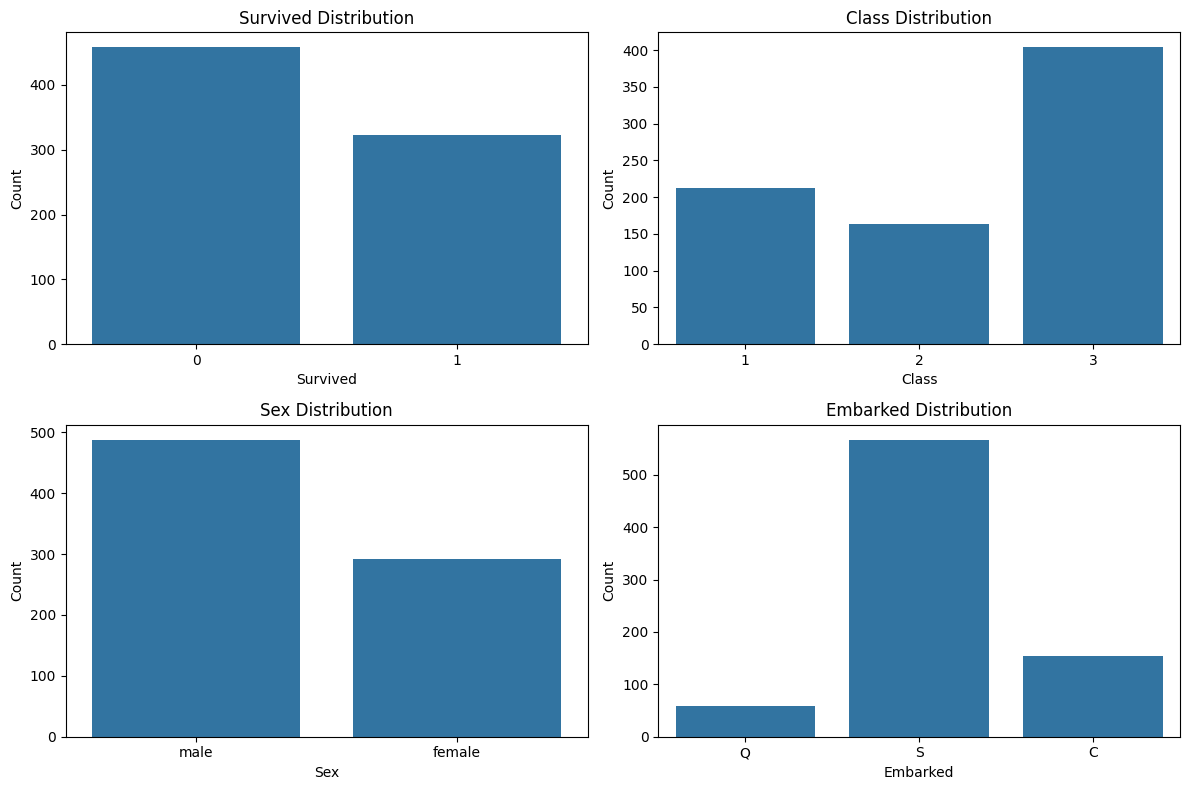

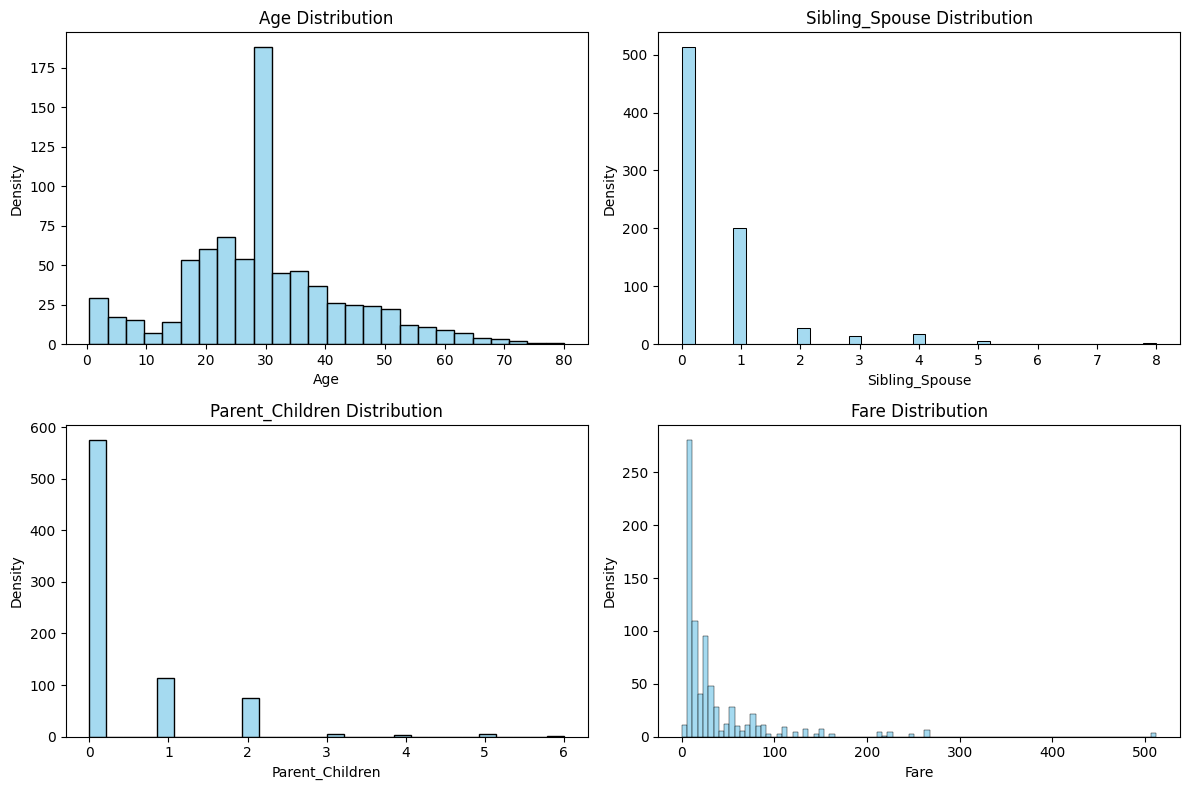

Age Summary Statistics:
mean    29.821051
std     13.719112
min      0.420000
max     80.000000
Name: Age, dtype: float64


Sibling_Spouse Summary Statistics:
mean    0.525641
std     0.988046
min     0.000000
max     8.000000
Name: Sibling_Spouse, dtype: float64


Parent_Children Summary Statistics:
mean    0.417949
std     0.838536
min     0.000000
max     6.000000
Name: Parent_Children, dtype: float64


Fare Summary Statistics:
mean     34.829108
std      52.263440
min       0.000000
max     512.329200
Name: Fare, dtype: float64




In [9]:
# Specify columns
categorical_columns = ['Survived', 'Class', 'Sex', 'Embarked']
numerical_columns = ['Age', 'Sibling_Spouse', 'Parent_Children', 'Fare']

# Subplots for categorical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=column, data=titanic_data, ax=ax)
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Subplots for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(titanic_data[column], ax=ax, color='skyblue')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Check for outliers in the numerical columns
for column in numerical_columns:
    print(f"{column} Summary Statistics:")
    print(titanic_data[column].describe()[['mean', 'std', 'min', 'max']])
    print("\n")

Save the data to a csv-file for further use

In [10]:
titanic_data.to_csv("titanic_data.csv", index=False)